# Python Programming

**Module 7 : Basic Data Science with Python** 

Python is a fun language to learn, and really easy to pick up even if you are new to programming. In fact, quite often, Python is easier to pick up if you do not have any programming experience whatsoever. Python is high level programming language, targeted at students and professionals from diverse backgrounds.

Python has two flavors -- Python 2 and Python 3. This set of examples are in Python 3, written and executed in the beautifully simple IDE Jupyter Notebook. Note that Jupyter has set up a `localhost:8888` server to render the notebook in your computer's browser. It can render anything now! Once you are familiar with the basic programming style and concepts of Python presented in this page, feel free to explore the other Modules in this repository.

This material is heavilly inspired by two wonderful lecture series in Python -- [Python4Maths by Andreas Ernst](https://gitlab.erc.monash.edu.au/andrease/Python4Maths) and [Python Lectures by Rajath Kumar](https://github.com/rajathkmp/Python-Lectures)

**License Declaration** : Following the lead from the inspirations for this material, and the *spirit* of Python education and development, all modules of this work are licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

---

## Essential Libraries

Let us begin by importing the essential Python Libraries.    
You may install any library using `conda install <library>`.    
Most of the libraries come by default with the Anaconda platform.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

We will also need the most common Python libraries for (basic) Machine Learning.      
Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   

**Linear Regression**
> `LinearRegression` model from `sklearn.linear_model` : Our main model for Regression   
> `mean_squared_error` metric from `sklearn.metrics` : Performance metric for Regression       

**Classification Tree**
> `DecisionTreeClassifier` model from `sklearn.tree` : Our main model for Classification   
> `plot_tree` method from `sklearn.tree` : Function to clearly visualize a Classification Tree   
> `confusion_matrix` metric from `sklearn.metrics` : Performance metric for Classification     

*Common Functionality*
> `train_test_split` method from `sklearn.model_selection` : Random Train-Test splits     

In [2]:
# Import essential models and functions from sklearn

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Classification Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Common Functionality
from sklearn.model_selection import train_test_split

---

## Case Study : Linear Regression

We use the **"Pokemon with stats"** dataset from Kaggle, curated by *Alberto Barradas* (https://www.kaggle.com/abcsds/pokemon).     

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [3]:
# Read the CSV Data
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Check the vital statistics of the dataset using the `type` and `shape` attributes.     
Check the variables (and their types) in the dataset using the `info()` method.

In [4]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)
print()
pkmndata.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Relationship between Numeric Variables

Check the mutual relationship between the numeric variables using Correlation and Jointplots.   

            Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


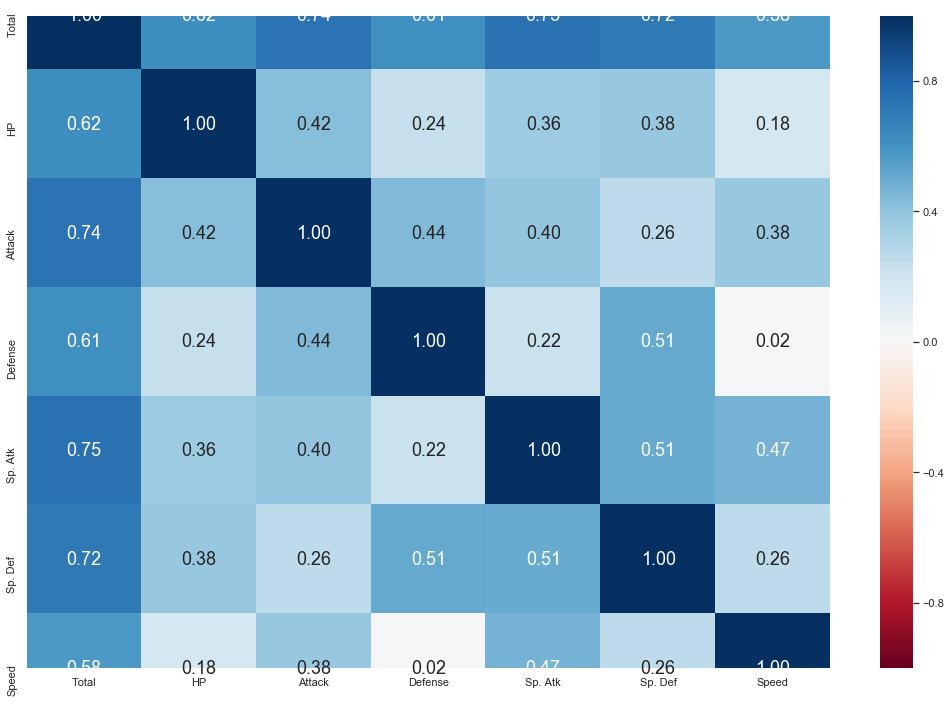

In [5]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Correlation Matrix
print(numDF.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(18, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

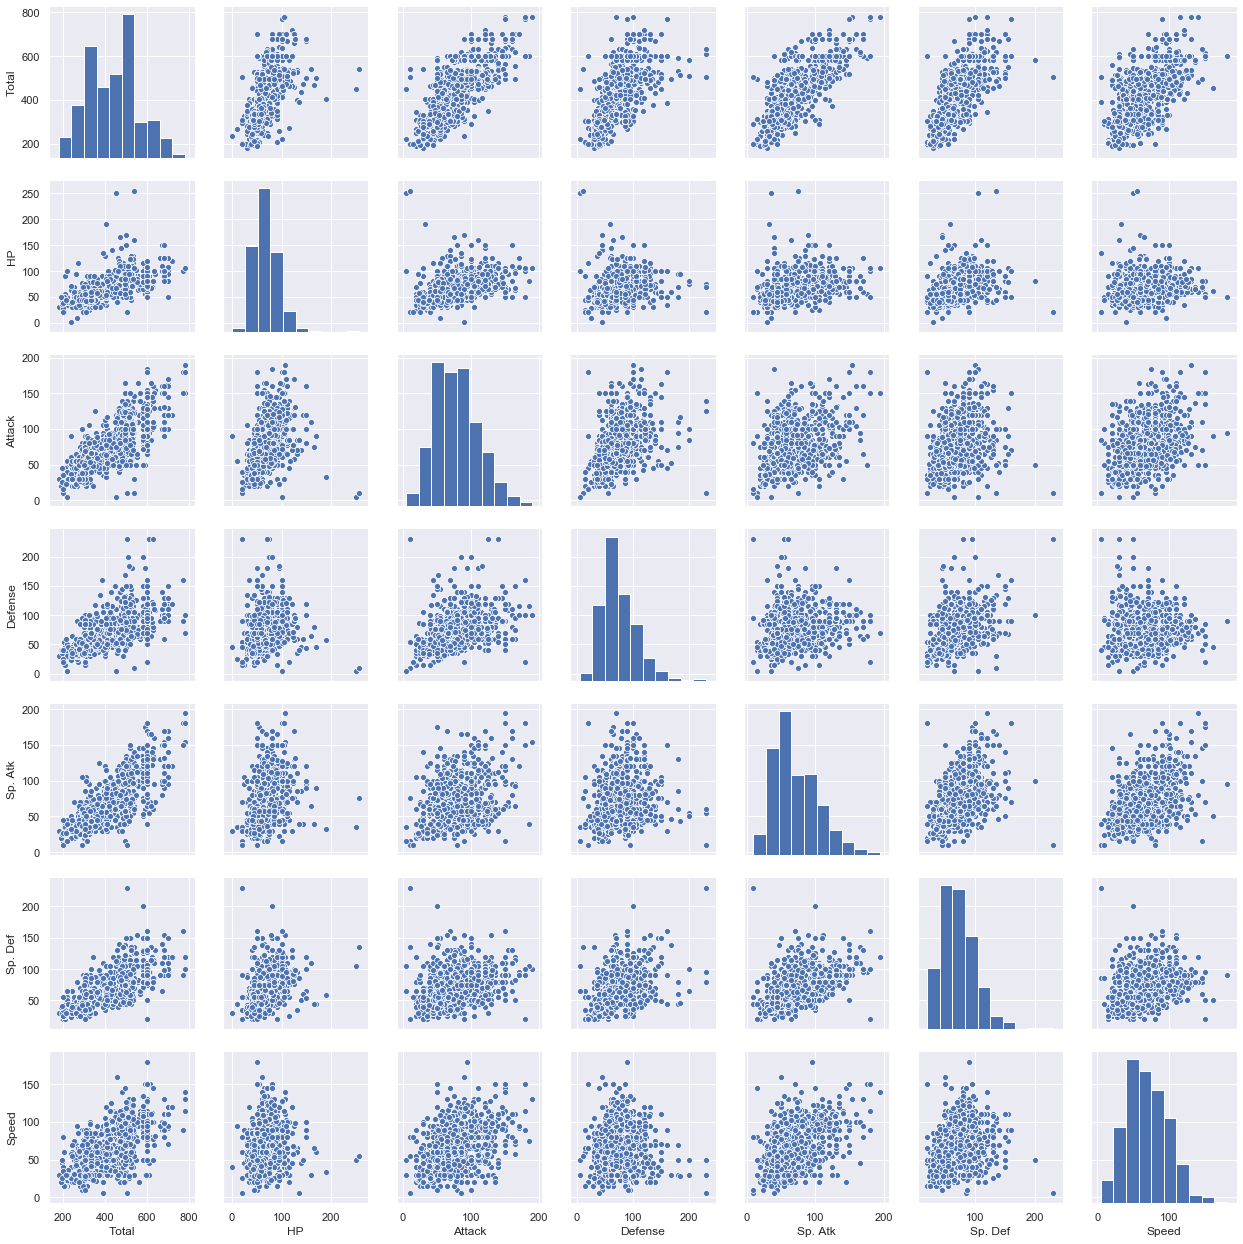

In [6]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

### Uni-Variate Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

> Regression Model : Response = $a$ $\times$ Predictor + $b$  

Check the mutual relationship between the variables to start with.

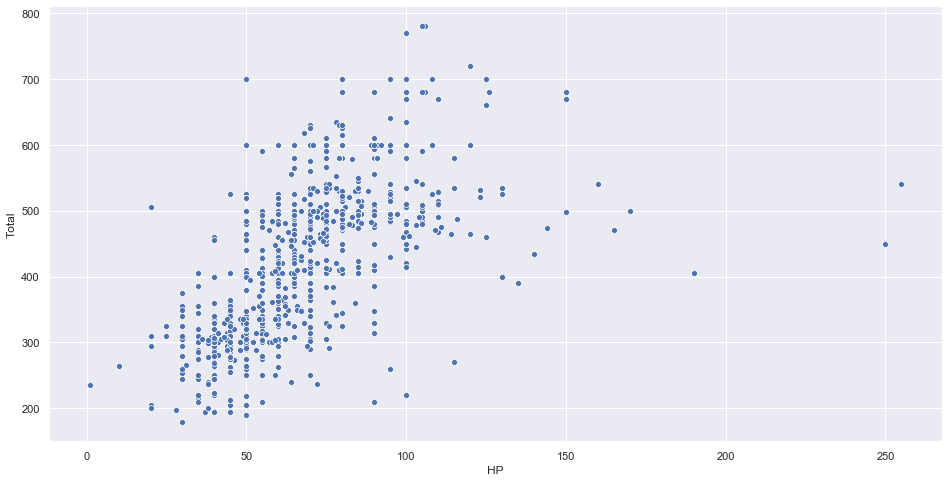

In [7]:
# Set up the problem with Predictor(s) and Response
predictor = "HP"
response = "Total"

# 2D scatterplot of two variables to observe their relationship
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = predictor, y = response, data = pkmndata)

Extract the Response and Predictor variables as two individual Pandas `DataFrame`.

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata[response])
X = pd.DataFrame(pkmndata[predictor])

Split the dataset randomly into Train and Test datasets using `train_test_split`.

In [9]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

`LinearRegression` is a class for the regression model in `sklearn`.     
We need to create an object of the `LinearRegression` class, as follows.     

In [10]:
# Create a Linear Regression object
linreg = LinearRegression()

Train the Linear Regression model using the Train Set `X_train` and `y_train`.   

In [11]:
# Train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

You have *trained* the model to fit the following formula.

>  Regression Problem : Response = $a$ $\times$ Predictor + $b$

Check Intercept ($b$) and Coefficient ($a$) of the regression line.

In [12]:
# Coefficients of the Linear Regression line
print('Intercept \t b = ', linreg.intercept_)
print('Coefficients \t a = ', linreg.coef_)

Intercept 	 b =  [237.58048744]
Coefficients 	 a =  [[2.87616222]]


Predict the response variable using the model you just trained.

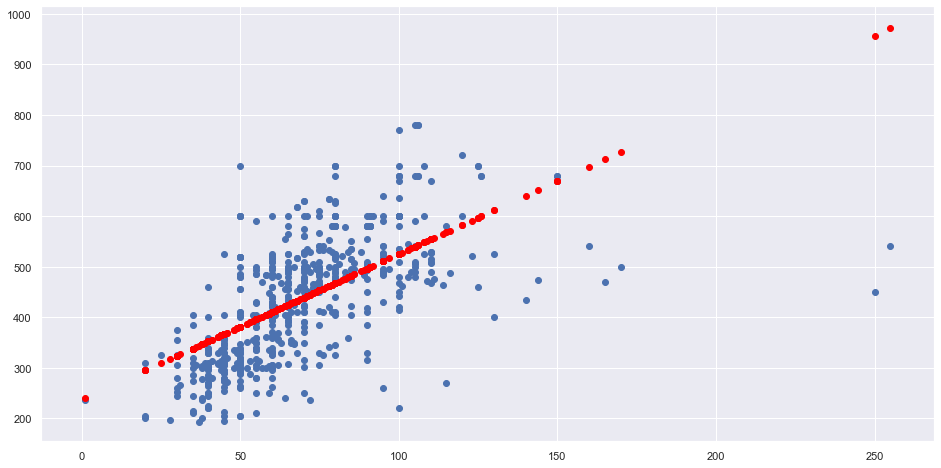

In [13]:
# Predict the Response on the Train Set
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "red")
plt.show()

Check the *Goodness of Fit* on the Train and Test Sets.    
Metrics : Explained Variance and Mean Squared Error.

In [14]:
# Explained Variance (R^2) on Train Set
print("Explained Variance (R^2) on Train Set \t", linreg.score(X_train, y_train))

# Mean Squared Error (MSE) on Train Set
y_train_pred = linreg.predict(X_train)
print("Mean Squared Error (MSE) on Train Set \t", mean_squared_error(y_train, y_train_pred))

# Mean Squared Error (MSE) on Test Set
y_test_pred = linreg.predict(X_test)
print("Mean Squared Error (MSE) on Test Set \t", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	 0.3821488789241636
Mean Squared Error (MSE) on Train Set 	 9030.559544734468
Mean Squared Error (MSE) on Test Set 	 8403.603800240488


It is quite meaningful to check the Predictions against the True values of the Response variable.

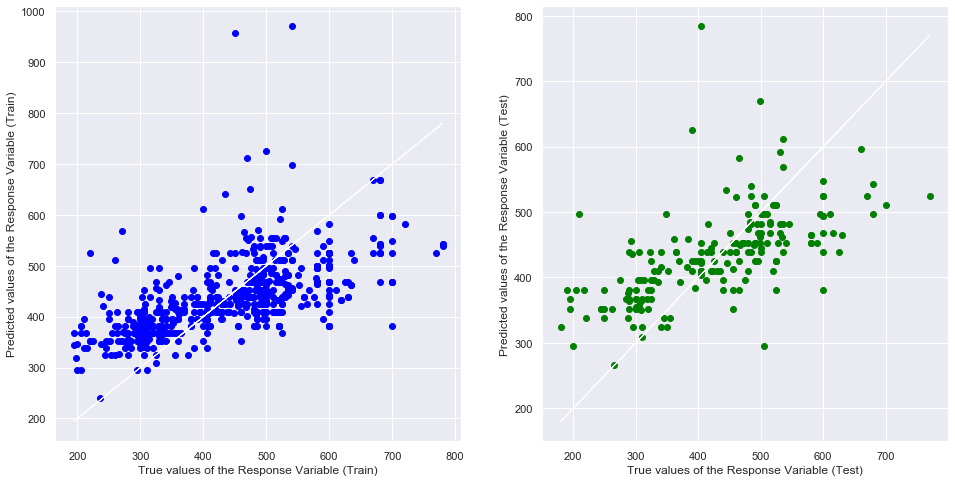

In [15]:
# Predict the Response for both Train and Test
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Quick Tasks

- Write a generic function in Python to perform Uni-Variate Linear Regression on an input dataset and any Response-Predictor pair.

### Multi-Variate Linear Regression

Let us set up a Multi-Variate Linear Regression problem.   

> Regression Model : Response = $a_1$ $\times$ Predictor$_1$ + $a_2$ $\times$ Predictor$_2$ + $\cdots$ + $a_k$ $\times$ Predictor$_k$ + $b$      

Fortunately, our standard Linear Regression code works.   

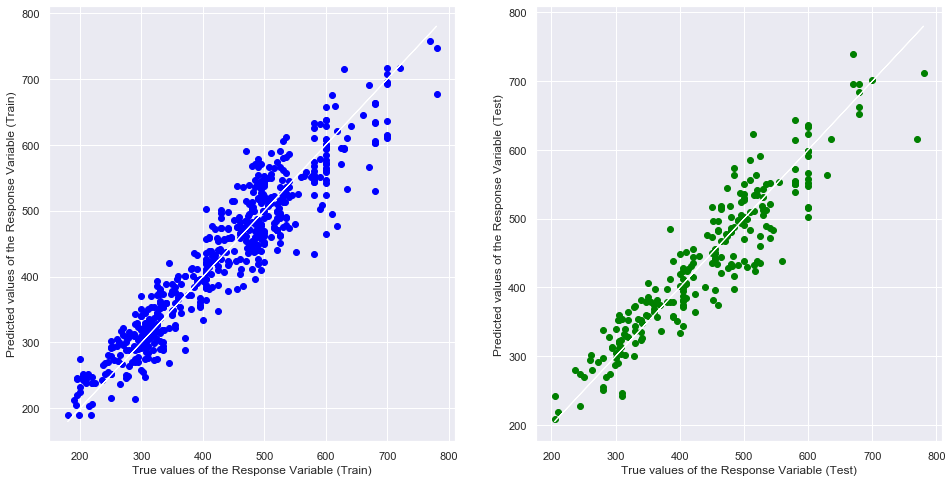

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	 0.8942430455026174
Mean Squared Error (MSE) 	 1606.3236825068861

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	 1612.4242463731246



In [16]:
# Specify the Predictors and Response
response = "Total"
predictors = ["HP", "Attack", "Defense", "Speed"]

# Extract Response and Predictors
y = pd.DataFrame(pkmndata[response])
X = pd.DataFrame(pkmndata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Train a Linear Regression Model
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t", mean_squared_error(y_test, y_test_pred))
print()

#### Quick Tasks

- Write a generic function in Python to perform Multi-Variate Linear Regression on an input dataset and any Response-Predictor(s) set.

---

## Case Study : Classification

We use the **"Pokemon with stats"** dataset from Kaggle, curated by *Alberto Barradas* (https://www.kaggle.com/abcsds/pokemon).     

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [17]:
# Read the CSV Data
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Check the vital statistics of the dataset using the `type` and `shape` attributes.     
Check the variables (and their types) in the dataset using the `info()` method.

In [18]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)
print()
pkmndata.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Uni-Variate Classification

We will start by setting up a Uni-Variate Classification problem.   

> Classification Model : Response vs Predictor 

Check the mutual relationship between the variables to start with.

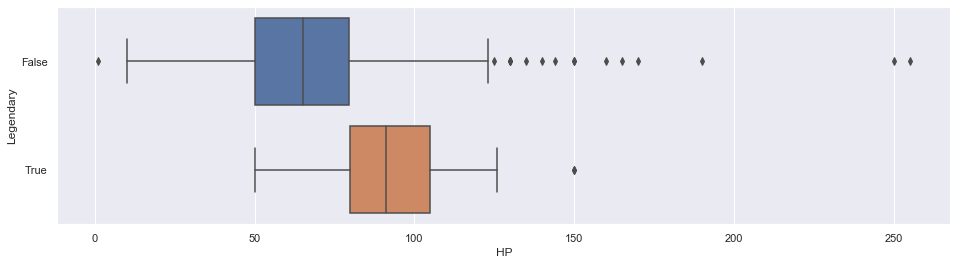

In [19]:
# Set up the problem with Predictor(s) and Response
predictor = "HP"
response = "Legendary"

# Convert the response variable to Category
pkmndata[response] = pkmndata[response].astype("category")

# Boxplot of numeric variable against categorical variable
f = plt.figure(figsize=(16, 4))
sb.boxplot(x = predictor, y = response, data = pkmndata)

Extract the Response and Predictor variables as two individual Pandas `DataFrame`.

In [20]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata[response])
X = pd.DataFrame(pkmndata[predictor])

# Convert the response to Binary
y[response] = y[response].astype("bool")

Split the dataset randomly into Train and Test datasets using `train_test_split`.

In [21]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

`DecisionTreeClassifier` is a class for the classification model in `sklearn`.     
We need to create an object of the `DecisionTreeClassifier` class, as follows.

In [22]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

Train the Classification Tree model using the Train Set `X_train` and `y_train`.   

In [23]:
# Train the Decision Tree model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

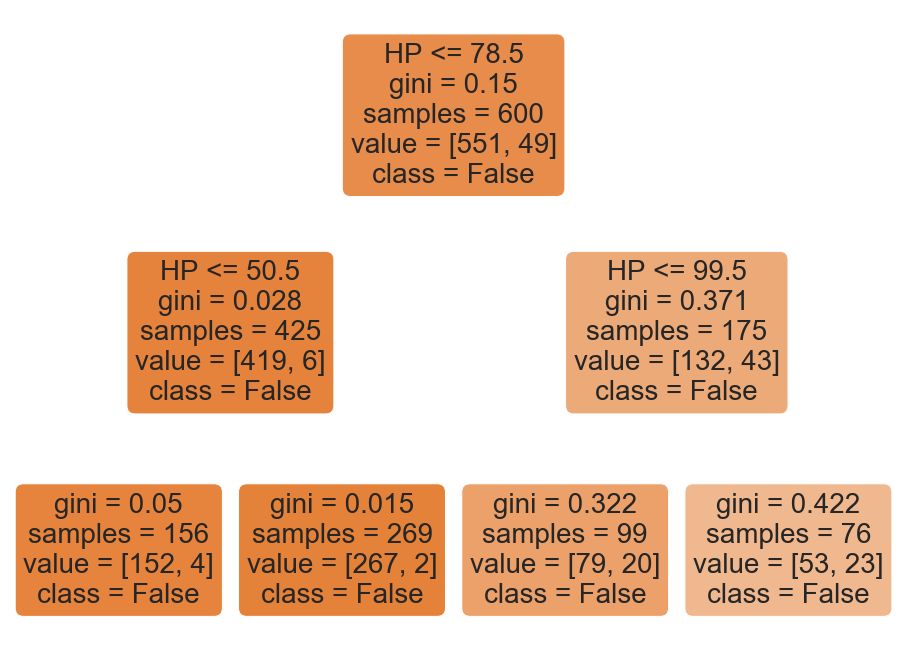

In [24]:
# Plot the Decision Tree model
f, axes = plt.subplots(1, 1, figsize=(16, 12))

plot_tree(dectree, 
          filled=True, 
          feature_names=X_train.columns,
          class_names=["False","True"],
          rounded = True)
plt.show()

Check the *Goodness of Fit* on the Train and Test Sets.    
Metrics : Classification Accuracy and Confusion Matrix.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9183333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.92



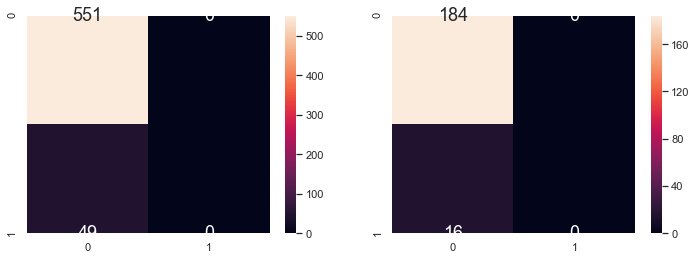

In [25]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Quick Tasks

- Write a generic function in Python to perform Uni-Variate Classification on an input dataset and any Response-Predictor pair.

### Multi-Variate Classification

Let us set up a Multi-Variate Classification problem.   

> Regression Model : Response vs {Predictor$_1$, Predictor$_2$, $\ldots$, Predictor$_k$}      

Fortunately, our standard Classification code works.   

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9232142857142858

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9041666666666667



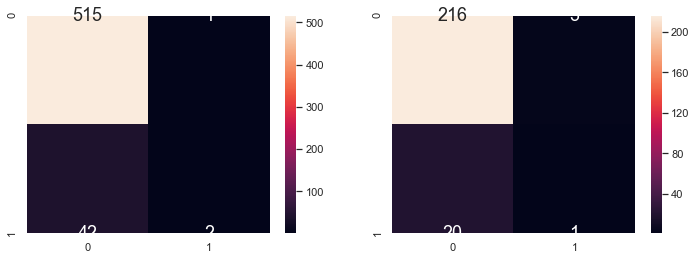

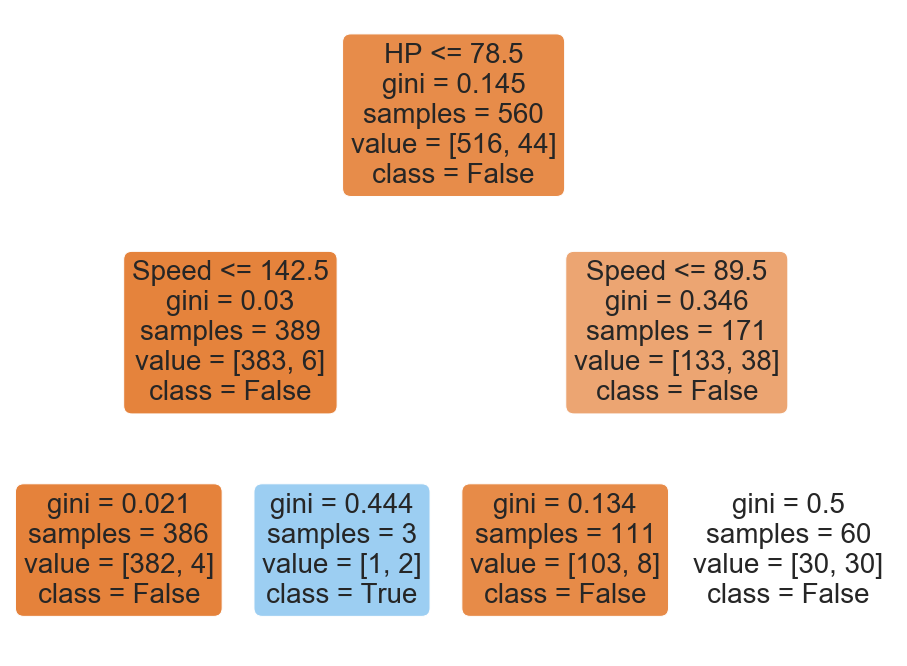

In [26]:
# Specify the Predictors and Response
response = "Legendary"
predictors = ["HP", "Attack", "Defense", "Speed"]

# Extract Response and Predictors
y = pd.DataFrame(pkmndata[response])
X = pd.DataFrame(pkmndata[predictors])

# Convert the response to Binary
y[response] = y[response].astype("bool")

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
f, axes = plt.subplots(1, 1, figsize=(16, 12))
plot_tree(dectree, 
          filled=True, 
          feature_names=X_train.columns,
          class_names=["False","True"],
          rounded = True)
plt.show()

#### Quick Tasks

- Write a generic function in Python to perform Multi-Variate Classification on an input dataset and any Response-Predictor(s) set.